### __In this Project we will be working with a dataset from University of California, Irvine's website. We will try to predict the total number of bikes people rented in a given hour. To accomplish this, we will create a few different machine learning models and evaluate their performance.__

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./bike_rental_hour.csv')

In [3]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
print df.shape
print df.isnull().any().sum()

(17379, 17)
0


This dataset contains 17379 rows and 17 columns, with each row representing the number of bike rentals for a single hour of a single day and this dataset has no missing values, which is good as our goal for this project is to focus more on improving machine learning models accuracy. <br>
We will predict __cnt__ column using all other columns. <br>
So lets just check the distribution of target column.

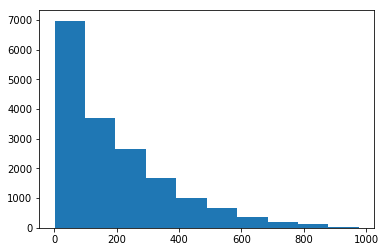

In [5]:
plt.hist(df.cnt);

Lets just check how other columns correlate to our target column.

In [6]:
df.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

Feature Engineering: Feature can enhance the accuracy of models by introducing new information, or distilling esisting information.
For ex: __hr__ column contains the hours during which bikes are rented, A machine will treat each hour differently, without understanding that certain hours are related. we will create new column with label __morning__(1), __afternoon__(2), __evening__(3) and __night__(4). This will bundle similar times together, and enabling model to make prediction. we can do similar engineering with other columns too.

In [7]:
def assign_label(hour):
    if   (hour >= 6) & (hour <= 12):
        return 1
    elif (hour >= 12 ) & (hour <= 18):
        return 2
    elif (hour >= 18 ) & (hour <= 24):
        return 3
    else:
        return 4
df['time_label'] = df.hr.apply(assign_label)

In [8]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4


In [9]:
df.time_label.value_counts()

1    5088
2    4375
4    4276
3    3640
Name: time_label, dtype: int64

__Below we will represent correlation matrix using heatmap and using Fancy Pandas Style__

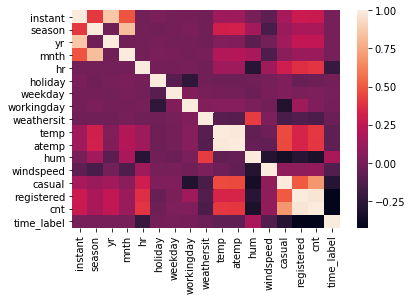

In [10]:
corr = df.corr()
sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns);

In [11]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
instant,1,0.4,0.87,0.49,-0.0048,0.015,0.0014,-0.0034,-0.014,0.14,0.14,0.0096,-0.075,0.16,0.28,0.28,0.0069
season,0.4,1,-0.011,0.83,-0.0061,-0.0096,-0.0023,0.014,-0.015,0.31,0.32,0.15,-0.15,0.12,0.17,0.18,0.0068
yr,0.87,-0.011,1,-0.01,-0.0039,0.0067,-0.0045,-0.0022,-0.019,0.041,0.039,-0.084,-0.0087,0.14,0.25,0.25,0.0049
mnth,0.49,0.83,-0.01,1,-0.0058,0.018,0.01,-0.0035,0.0054,0.2,0.21,0.16,-0.14,0.068,0.12,0.12,0.006
hr,-0.0048,-0.0061,-0.0039,-0.0058,1,0.00048,-0.0035,0.0023,-0.02,0.14,0.13,-0.28,0.14,0.3,0.37,0.39,-0.22
holiday,0.015,-0.0096,0.0067,0.018,0.00048,1,-0.1,-0.25,-0.017,-0.027,-0.031,-0.011,0.004,0.032,-0.047,-0.031,-0.00071
weekday,0.0014,-0.0023,-0.0045,0.01,-0.0035,-0.1,1,0.036,0.0033,-0.0018,-0.0088,-0.037,0.012,0.033,0.022,0.027,0.0023
workingday,-0.0034,0.014,-0.0022,-0.0035,0.0023,-0.25,0.036,1,0.045,0.055,0.055,0.016,-0.012,-0.3,0.13,0.03,-0.00097
weathersit,-0.014,-0.015,-0.019,0.0054,-0.02,-0.017,0.0033,0.045,1,-0.1,-0.11,0.42,0.026,-0.15,-0.12,-0.14,-0.036
temp,0.14,0.31,0.041,0.2,0.14,-0.027,-0.0018,0.055,-0.1,1,0.99,-0.07,-0.023,0.46,0.34,0.4,-0.076


Few of our columns are highly correlated for example: temp and atemp.

We are going to select 80% of the rows in df to be a part of training set, and 20% for out testing set but here we are only selecting rows that are not in training set.

In [12]:
train = df.sample(frac = .8)
test  = df.loc[~df.index.isin(train.index)]

In [13]:
print 'Training dataset shape: ', train.shape
print 'Testing dataset shape: ', test.shape

Training dataset shape:  (13903, 18)
Testing dataset shape:  (3476, 18)


In [14]:
X = train.drop(['cnt', 'casual', 'dteday', 'registered'], axis = 1 )
y = train.cnt
X_test = test.drop(['cnt', 'casual', 'dteday', 'registered'], axis = 1 )
y_test = test.cnt

## _Using Linear Reg._

In [15]:
lr = LinearRegression()
lr.fit(X, y)

predictions = lr.predict(X_test)
np.mean((predictions - y_test) ** 2)

17339.032876420522

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## _Using Decision Tree_

In [16]:
# Using Decision tree
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

predictions = dtr.predict(X_test)
np.mean((predictions - y_test) ** 2)

3192.2586306098965

In [17]:
#min_sample_lead = 5
# Using Decision tree
dtr = DecisionTreeRegressor(min_samples_leaf= 5)
dtr.fit(X, y)

predictions = dtr.predict(X_test)
np.mean((predictions - y_test) ** 2)

2628.666512848353

Using Nonlinear Predictor __"Decision Tree Regressor"__ we have much higher accuracy than linear regression model.

## _Using Random Forest Algorithm._

In [18]:
rf = RandomForestRegressor()
rf.fit(X, y)
predictions = rf.predict(X_test)
np.mean((predictions - y_test) ** 2)

1849.1567548906824

In [19]:
#using min_sample_leaf = 2
rf = RandomForestRegressor(min_samples_leaf= 2)
rf.fit(X, y)
predictions = rf.predict(X_test)
np.mean((predictions - y_test) ** 2)

1752.5075866985

Lets try to tune our model

In [20]:
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

rf_params = {'n_estimators':[10, 25, 50], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_rf = GridSearchCV(rf, param_grid=rf_params, verbose=1, cv=cv)
grid_rf.fit(X,y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/lucky/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   52.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=21, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 25, 50], 'min_samples_split': [2, 5, 10], 'max_depth': [3, 5, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
grid_rf.best_score_


pred = grid_rf.predict(X_test)
print np.mean((pred - y_test) ** 2)

1687.07289393


Using Random Forest algorithm, which improves on the Decision tree algorithm we had higher accuracy than Decision Tree. Random Foresets tend to be much more accurate than simple models like linear regression. They also tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so It's important to tune paraments like maximum depth and minimum sample x leaf.

__Its possible to further improve our accuracy using grid search and gradient boost machine learning algorithms suchs as: XGboost, catboost etc. below we will try catboost. An open source machine learning gradient boost by Yandex.__

In [22]:
from catboost import CatBoostRegressor

In [25]:
wild_cat = CatBoostRegressor(depth = 12)
wild_cat.fit(X, y)


0:	learn: 255.3669795	total: 29.2ms	remaining: 29.2s
1:	learn: 248.8744425	total: 90.3ms	remaining: 45.1s
2:	learn: 242.8692053	total: 120ms	remaining: 39.8s
3:	learn: 237.1977663	total: 131ms	remaining: 32.6s
4:	learn: 231.2277217	total: 143ms	remaining: 28.4s
5:	learn: 225.1624313	total: 208ms	remaining: 34.4s
6:	learn: 219.4465851	total: 288ms	remaining: 40.8s
7:	learn: 214.6582689	total: 301ms	remaining: 37.3s
8:	learn: 209.2368946	total: 333ms	remaining: 36.6s
9:	learn: 204.5009510	total: 396ms	remaining: 39.2s
10:	learn: 199.3239017	total: 459ms	remaining: 41.3s
11:	learn: 194.8079972	total: 471ms	remaining: 38.8s
12:	learn: 190.0261253	total: 545ms	remaining: 41.4s
13:	learn: 185.4267092	total: 557ms	remaining: 39.2s
14:	learn: 181.1450254	total: 622ms	remaining: 40.9s
15:	learn: 177.4177747	total: 631ms	remaining: 38.8s
16:	learn: 173.3502416	total: 684ms	remaining: 39.6s
17:	learn: 169.2389040	total: 701ms	remaining: 38.3s
18:	learn: 165.2376645	total: 769ms	remaining: 39.7s
1

158:	learn: 43.7301766	total: 8.35s	remaining: 44.2s
159:	learn: 43.6465842	total: 8.37s	remaining: 43.9s
160:	learn: 43.5878811	total: 8.43s	remaining: 43.9s
161:	learn: 43.4937048	total: 8.5s	remaining: 44s
162:	learn: 43.4093103	total: 8.57s	remaining: 44s
163:	learn: 43.4041007	total: 8.58s	remaining: 43.7s
164:	learn: 43.3801084	total: 8.59s	remaining: 43.5s
165:	learn: 43.2822563	total: 8.67s	remaining: 43.5s
166:	learn: 43.2384086	total: 8.7s	remaining: 43.4s
167:	learn: 43.1845237	total: 8.77s	remaining: 43.4s
168:	learn: 43.0959198	total: 8.84s	remaining: 43.5s
169:	learn: 43.0184786	total: 8.91s	remaining: 43.5s
170:	learn: 42.9483180	total: 8.97s	remaining: 43.5s
171:	learn: 42.9270866	total: 8.98s	remaining: 43.2s
172:	learn: 42.8455888	total: 9.05s	remaining: 43.3s
173:	learn: 42.7825685	total: 9.12s	remaining: 43.3s
174:	learn: 42.7219519	total: 9.14s	remaining: 43.1s
175:	learn: 42.6788581	total: 9.2s	remaining: 43.1s
176:	learn: 42.6086104	total: 9.27s	remaining: 43.1s


322:	learn: 40.0643880	total: 12.9s	remaining: 27s
323:	learn: 40.0643822	total: 12.9s	remaining: 26.9s
324:	learn: 40.0643000	total: 12.9s	remaining: 26.8s
325:	learn: 40.0642997	total: 12.9s	remaining: 26.6s
326:	learn: 40.0311826	total: 13s	remaining: 26.7s
327:	learn: 40.0311703	total: 13s	remaining: 26.6s
328:	learn: 40.0003938	total: 13s	remaining: 26.6s
329:	learn: 40.0003850	total: 13.1s	remaining: 26.5s
330:	learn: 40.0003846	total: 13.1s	remaining: 26.4s
331:	learn: 40.0003727	total: 13.1s	remaining: 26.3s
332:	learn: 40.0003725	total: 13.1s	remaining: 26.2s
333:	learn: 40.0002354	total: 13.1s	remaining: 26.1s
334:	learn: 40.0002354	total: 13.1s	remaining: 26s
335:	learn: 39.9397760	total: 13.1s	remaining: 26s
336:	learn: 39.9397758	total: 13.1s	remaining: 25.9s
337:	learn: 39.8926146	total: 13.2s	remaining: 25.9s
338:	learn: 39.8207968	total: 13.3s	remaining: 25.9s
339:	learn: 39.8207898	total: 13.3s	remaining: 25.8s
340:	learn: 39.7715180	total: 13.4s	remaining: 25.9s
341:	

479:	learn: 35.3697883	total: 21.1s	remaining: 22.9s
480:	learn: 35.3329717	total: 21.2s	remaining: 22.9s
481:	learn: 35.2982588	total: 21.3s	remaining: 22.9s
482:	learn: 35.2744297	total: 21.3s	remaining: 22.8s
483:	learn: 35.2417435	total: 21.4s	remaining: 22.8s
484:	learn: 35.2047670	total: 21.5s	remaining: 22.8s
485:	learn: 35.1758767	total: 21.6s	remaining: 22.8s
486:	learn: 35.1469670	total: 21.6s	remaining: 22.8s
487:	learn: 35.1307737	total: 21.7s	remaining: 22.8s
488:	learn: 35.0947155	total: 21.8s	remaining: 22.7s
489:	learn: 35.0700710	total: 21.8s	remaining: 22.7s
490:	learn: 35.0498210	total: 21.9s	remaining: 22.7s
491:	learn: 35.0097010	total: 22s	remaining: 22.7s
492:	learn: 34.9982143	total: 22.1s	remaining: 22.7s
493:	learn: 34.9870334	total: 22.1s	remaining: 22.7s
494:	learn: 34.9546482	total: 22.2s	remaining: 22.6s
495:	learn: 34.9248239	total: 22.3s	remaining: 22.6s
496:	learn: 34.8994124	total: 22.3s	remaining: 22.6s
497:	learn: 34.8899277	total: 22.4s	remaining: 2

637:	learn: 32.0686003	total: 35.2s	remaining: 19.9s
638:	learn: 32.0588689	total: 35.3s	remaining: 19.9s
639:	learn: 32.0320783	total: 35.3s	remaining: 19.9s
640:	learn: 32.0199410	total: 35.5s	remaining: 19.9s
641:	learn: 31.9921947	total: 35.5s	remaining: 19.8s
642:	learn: 31.9842851	total: 35.6s	remaining: 19.8s
643:	learn: 31.9646175	total: 35.7s	remaining: 19.7s
644:	learn: 31.9456163	total: 35.8s	remaining: 19.7s
645:	learn: 31.9311697	total: 35.9s	remaining: 19.7s
646:	learn: 31.9116061	total: 36s	remaining: 19.6s
647:	learn: 31.9075465	total: 36s	remaining: 19.6s
648:	learn: 31.8891482	total: 36.1s	remaining: 19.5s
649:	learn: 31.8646381	total: 36.2s	remaining: 19.5s
650:	learn: 31.8489923	total: 36.3s	remaining: 19.4s
651:	learn: 31.8322619	total: 36.3s	remaining: 19.4s
652:	learn: 31.8191402	total: 36.4s	remaining: 19.3s
653:	learn: 31.7837307	total: 36.5s	remaining: 19.3s
654:	learn: 31.7779700	total: 36.6s	remaining: 19.3s
655:	learn: 31.7551082	total: 36.7s	remaining: 19.

796:	learn: 29.7617607	total: 46.7s	remaining: 11.9s
797:	learn: 29.7512149	total: 46.7s	remaining: 11.8s
798:	learn: 29.7446007	total: 46.8s	remaining: 11.8s
799:	learn: 29.7373633	total: 46.9s	remaining: 11.7s
800:	learn: 29.7326858	total: 46.9s	remaining: 11.7s
801:	learn: 29.7250566	total: 47s	remaining: 11.6s
802:	learn: 29.7141824	total: 47.1s	remaining: 11.5s
803:	learn: 29.7041424	total: 47.1s	remaining: 11.5s
804:	learn: 29.6930819	total: 47.2s	remaining: 11.4s
805:	learn: 29.6839857	total: 47.3s	remaining: 11.4s
806:	learn: 29.6839822	total: 47.3s	remaining: 11.3s
807:	learn: 29.6661976	total: 47.4s	remaining: 11.3s
808:	learn: 29.6541199	total: 47.4s	remaining: 11.2s
809:	learn: 29.6507926	total: 47.5s	remaining: 11.1s
810:	learn: 29.6174134	total: 47.6s	remaining: 11.1s
811:	learn: 29.6098575	total: 47.6s	remaining: 11s
812:	learn: 29.5919103	total: 47.7s	remaining: 11s
813:	learn: 29.5862010	total: 47.8s	remaining: 10.9s
814:	learn: 29.5738003	total: 47.8s	remaining: 10.9s

955:	learn: 28.0413507	total: 57.7s	remaining: 2.65s
956:	learn: 28.0324301	total: 57.8s	remaining: 2.6s
957:	learn: 28.0262064	total: 57.8s	remaining: 2.53s
958:	learn: 28.0141194	total: 57.9s	remaining: 2.47s
959:	learn: 28.0099837	total: 58s	remaining: 2.42s
960:	learn: 28.0027005	total: 58s	remaining: 2.35s
961:	learn: 27.9964485	total: 58.1s	remaining: 2.29s
962:	learn: 27.9806143	total: 58.2s	remaining: 2.23s
963:	learn: 27.9738596	total: 58.2s	remaining: 2.17s
964:	learn: 27.9571535	total: 58.3s	remaining: 2.11s
965:	learn: 27.9489034	total: 58.4s	remaining: 2.05s
966:	learn: 27.9449464	total: 58.4s	remaining: 1.99s
967:	learn: 27.9351844	total: 58.5s	remaining: 1.93s
968:	learn: 27.9267839	total: 58.6s	remaining: 1.87s
969:	learn: 27.9240898	total: 58.6s	remaining: 1.81s
970:	learn: 27.9154381	total: 58.7s	remaining: 1.75s
971:	learn: 27.9147057	total: 58.8s	remaining: 1.69s
972:	learn: 27.9085625	total: 58.8s	remaining: 1.63s
973:	learn: 27.9055672	total: 58.9s	remaining: 1.57

In [28]:
predictions = wild_cat.predict(X_test)
np.mean((predictions - y_test) ** 2)

1217.1769189485344

### __We jumped from MSE of 16290 to MSE of 1217 by using different machine learning algorithms.__